In [139]:
x = pd.crosstab(df_data["RESULT_LAST_CAMPAIGN"],df_data["CONTACT"]).apply(lambda r: round(r/r.sum()*100,2), axis=1)
print(x)
#print(pd.crosstab(df_data["JOB_TYPE"],df_data["STATUS"],margins=True,margins_name="Total"))

CONTACT                  0      1      2
RESULT_LAST_CAMPAIGN                    
0                     9.55   1.47  88.97
1                     6.97   0.61  92.42
2                     6.16  35.06  58.79
3                     7.47   0.81  91.72


In [28]:
df_data.head()

,DATE,AGE,JOB_TYPE,STATUS,EDUCATION,HAS_DEFAULT,BALANCE,HAS_HOUSING_LOAN,HAS_PERSO_LOAN,CONTACT,DURATION_CONTACT,NB_CONTACT,NB_DAY_LAST_CONTACT,NB_CONTACT_LAST_CAMPAIGN,RESULT_LAST_CAMPAIGN,SUBSCRIPTION
0,2008-05-05,58,7,2,2,0,2143,1,0,1,261,1,-1,0,2,0
1,2008-05-05,123,10,2,1,0,29,1,0,1,151,1,-1,0,2,0
2,2008-05-05,33,4,2,1,0,2,1,1,1,76,1,-1,0,2,0
3,2008-05-05,47,2,2,1,0,1506,1,0,1,92,1,-1,0,2,0
4,2008-05-05,33,2,0,1,0,1,0,0,1,198,1,-1,0,2,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000208FC924E48>]],
      dtype=object)

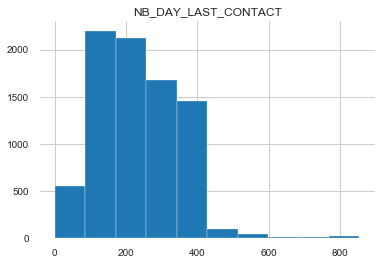

In [47]:
df_data.query('NB_DAY_LAST_CONTACT > 0').hist("NB_DAY_LAST_CONTACT")

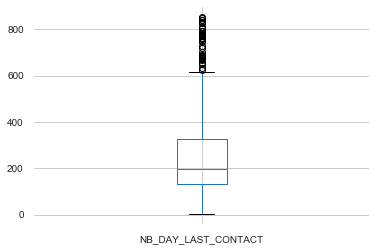

In [46]:
df_data.query('NB_DAY_LAST_CONTACT > 0').boxplot("NB_DAY_LAST_CONTACT")

In [50]:
df_data.query('NB_DAY_LAST_CONTACT > 0').filter(['NB_DAY_LAST_CONTACT']).describe()

,NB_DAY_LAST_CONTACT
count,8202.000000
mean,224.857596
std,114.848322
min,1.000000
25%,133.250000
50%,195.000000
75%,327.000000
max,854.000000


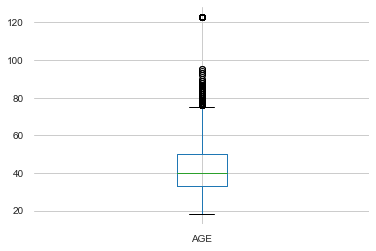

In [51]:
df_data.boxplot("AGE")

In [65]:
x1 = 'NB_DAY_LAST_CONTACT > 0'
x2 = 'AGE < 123'

In [66]:
# Retirer variables
index_col_to_treat = df_data.query(x2).index
df = df_data.query(x2)
print(df[np.abs(df.NB_DAY_LAST_CONTACT-df.NB_DAY_LAST_CONTACT.mean())<=(3*df.NB_DAY_LAST_CONTACT.std())].shape)
print(df[~(np.abs(df.NB_DAY_LAST_CONTACT-df.NB_DAY_LAST_CONTACT.mean())>(3*df.NB_DAY_LAST_CONTACT.std()))].shape)

(41677, 16)
(41677, 16)


In [135]:
def hist_quanti_with_restriction(name_data,name_column,restriction,relation):

    df = name_data.query('{} {} {}'.format(name_column,relation,restr))
    mean_col = np.mean(df[name_column])
    std_col = np.std(df[name_column])

    plt.subplot(211)
    plt.figure(figsize = (14, 6))
    plt.title("Valeurs aberrantes")
    plt.xlabel(name_column)

    plt.hist(df[name_column],bins=100)

    plt.axvline(mean_col, color='#FD4E40', linestyle='solid', linewidth=2, label = "Mean")

    plt.axvline(mean_col + std_col, color='#FFB908', linestyle='solid', linewidth=2, label = "Standard Deviations")
    plt.axvline(mean_col - std_col, color='#FFB908', linestyle='solid', linewidth=2)

    plt.axvline(mean_col + std_col * 2, color='#FFB908', linestyle='solid', linewidth=2)
    plt.axvline(mean_col - std_col * 2, color='#FFB908', linestyle='solid', linewidth=2)

    plt.axvline(mean_col + std_col * 3, color='#FFB908', linestyle='solid', linewidth=2)
    plt.axvline(mean_col - std_col * 3, color='#FFB908', linestyle='solid', linewidth=2)

    #plt.axvline(check_value, color='#62EDBF', linestyle='solid', linewidth=2, label = "You")

    plt.legend()

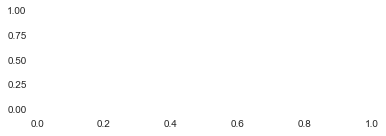

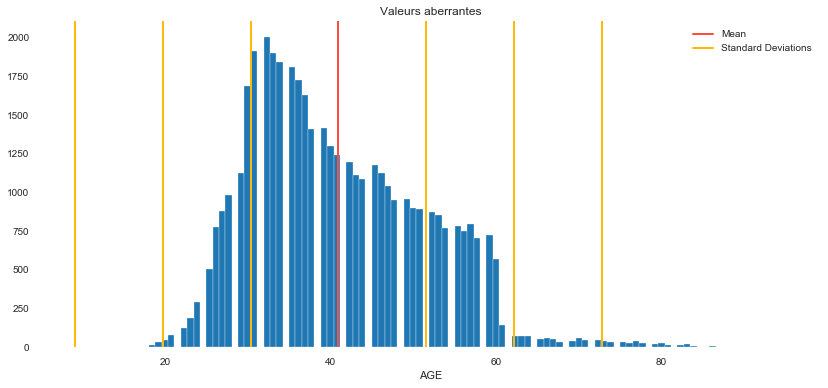

In [136]:
hist_quanti_with_restriction(df_data,"AGE","123","<")

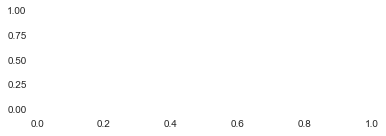

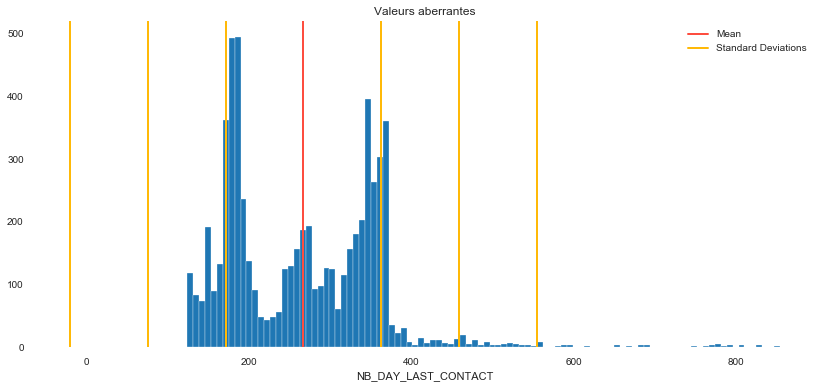

In [137]:
hist_quanti_with_restriction(df_data,"NB_DAY_LAST_CONTACT","0",">")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020883F86288>]],
      dtype=object)

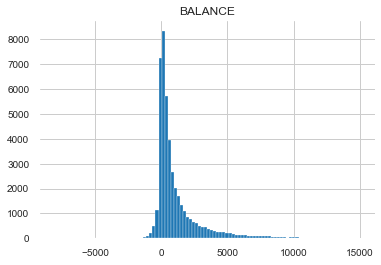

In [138]:
df_data.query('BALANCE < 15000').filter(["BALANCE"]).hist(bins=100)

In [142]:
df_data["BALANCE"].describe()

count     45136.000000
mean       1362.182847
std        3046.691765
min       -8019.000000
25%          72.000000
50%         447.500000
75%        1425.000000
max      102127.000000
Name: BALANCE, dtype: float64

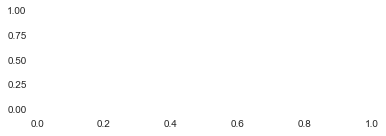

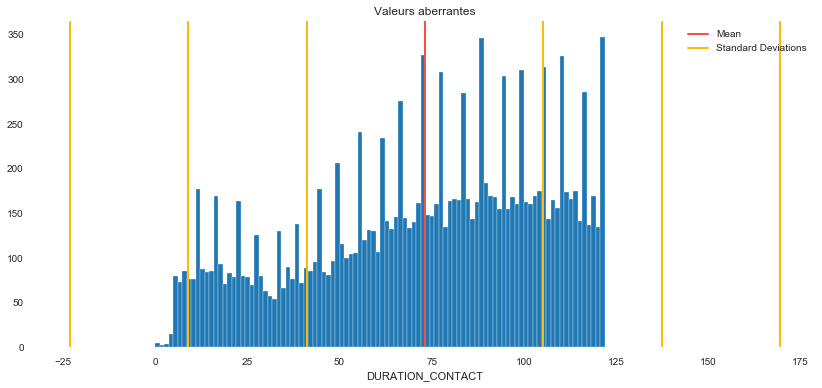

In [141]:
hist_quanti_with_restriction(df_data,"DURATION_CONTACT","2000","<")

In [ ]:
df=pd.DataFrame({'Data':np.random.normal(size=200)})  #example dataset of normally distributed data. 
df[np.abs(df.Data-df.Data.mean())<=(3*df.Data.std())] #keep only the ones that are within +3 to -3 standard deviations in the column 'Data'.
df[~(np.abs(df.Data-df.Data.mean())>(3*df.Data.std()))] #or if you prefer the other way around

In [ ]:
df = pd.DataFrame(np.random.randn(100, 3), columns=list('ABC'))

df[df.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]

## Partie plus clean

In [145]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import pylab
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn import linear_model 
from sklearn.preprocessing import LabelEncoder

import seaborn as sns
from sklearn import metrics

In [146]:
df_data = pd.read_csv("data.csv")
print(df_data.shape)
df_data.head(5)

(45136, 16)


,DATE,AGE,JOB_TYPE,STATUS,EDUCATION,HAS_DEFAULT,BALANCE,HAS_HOUSING_LOAN,HAS_PERSO_LOAN,CONTACT,DURATION_CONTACT,NB_CONTACT,NB_DAY_LAST_CONTACT,NB_CONTACT_LAST_CAMPAIGN,RESULT_LAST_CAMPAIGN,SUBSCRIPTION
0,2008-05-05,58,Manager,Marié,Tertiaire,No,2143,Yes,No,NaN,261,1,-1,0,NaN,No
1,2008-05-05,123,Technicien,NaN,Secondaire,No,29,Yes,NaN,NaN,151,1,-1,0,NaN,No
2,2008-05-05,33,Entrepreuneur,Marié,Secondaire,No,2,Yes,Yes,NaN,76,1,-1,0,NaN,No
3,2008-05-05,47,Col bleu,Marié,NaN,No,1506,Yes,No,NaN,92,1,-1,0,NaN,No
4,2008-05-05,33,NaN,Célibataire,NaN,No,1,No,No,NaN,198,1,-1,0,NaN,No


In [147]:
def check_percentage_NaN(name_data):
        return round(name_data.isnull().sum()/name_data.shape[0]*100,2)

In [148]:
check_percentage_NaN(df_data)

DATE                         0.00
AGE                          0.00
JOB_TYPE                     0.63
STATUS                       2.50
EDUCATION                    4.11
HAS_DEFAULT                  0.00
BALANCE                      0.00
HAS_HOUSING_LOAN             0.00
HAS_PERSO_LOAN               3.00
CONTACT                     28.84
DURATION_CONTACT             0.00
NB_CONTACT                   0.00
NB_DAY_LAST_CONTACT          0.00
NB_CONTACT_LAST_CAMPAIGN     0.00
RESULT_LAST_CAMPAIGN        81.84
SUBSCRIPTION                 0.00
dtype: float64

In [149]:
df_data["RESULT_LAST_CAMPAIGN"] = df_data["RESULT_LAST_CAMPAIGN"].replace(np.NaN,"Not contacted")

In [150]:
df_data["CONTACT"] = df_data["CONTACT"].replace(np.NaN,"No")

In [151]:
check_percentage_NaN(df_data)

DATE                        0.00
AGE                         0.00
JOB_TYPE                    0.63
STATUS                      2.50
EDUCATION                   4.11
HAS_DEFAULT                 0.00
BALANCE                     0.00
HAS_HOUSING_LOAN            0.00
HAS_PERSO_LOAN              3.00
CONTACT                     0.00
DURATION_CONTACT            0.00
NB_CONTACT                  0.00
NB_DAY_LAST_CONTACT         0.00
NB_CONTACT_LAST_CAMPAIGN    0.00
RESULT_LAST_CAMPAIGN        0.00
SUBSCRIPTION                0.00
dtype: float64

In [152]:
def NaN_to_mode_quali(name_data,name_column):
    distinct_value = name_data[name_column].value_counts()
    NaN_replace = distinct_value[distinct_value == max(distinct_value)].index[0]
    return name_data[name_column].fillna(NaN_replace)

In [153]:
quali_to_treat = ["JOB_TYPE","STATUS","EDUCATION","HAS_PERSO_LOAN"]
for col in quali_to_treat:
    df_data[col] = NaN_to_mode_quali(df_data, col)

In [154]:
check_percentage_NaN(df_data)

DATE                        0.0
AGE                         0.0
JOB_TYPE                    0.0
STATUS                      0.0
EDUCATION                   0.0
HAS_DEFAULT                 0.0
BALANCE                     0.0
HAS_HOUSING_LOAN            0.0
HAS_PERSO_LOAN              0.0
CONTACT                     0.0
DURATION_CONTACT            0.0
NB_CONTACT                  0.0
NB_DAY_LAST_CONTACT         0.0
NB_CONTACT_LAST_CAMPAIGN    0.0
RESULT_LAST_CAMPAIGN        0.0
SUBSCRIPTION                0.0
dtype: float64

In [155]:
def label_encodage_column(name_data,name_column):
    le = LabelEncoder()
    le.fit(name_data[name_column])
    return list(le.transform(name_data[name_column]))

In [156]:
column_to_treat = ["JOB_TYPE","STATUS","EDUCATION","HAS_DEFAULT","HAS_HOUSING_LOAN","HAS_PERSO_LOAN","HAS_PERSO_LOAN","CONTACT","RESULT_LAST_CAMPAIGN","SUBSCRIPTION"]
for col in column_to_treat:
    df_data[col] = label_encodage_column(df_data, col)

## Modèle simple

In [157]:
y = df_data["SUBSCRIPTION"]
X = df_data.drop(["SUBSCRIPTION","DATE"],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [158]:
logreg = linear_model.LogisticRegression()
logreg.fit(X_train,y_train)
y_pred_logit = logreg.predict(X_test)

D:\PYTHON_LOG\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8977918912931098


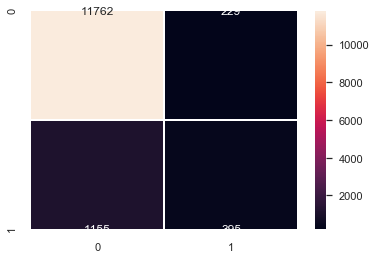

In [159]:
mc = metrics.confusion_matrix(y_test,y_pred_logit)
acc = metrics.accuracy_score(y_test, y_pred_logit)
print(acc)
sns.set()
sns.heatmap(mc, linewidths=.5, annot=True, fmt="d")